In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
parks_data = pd.read_csv('Data/parks_states_sub.csv', low_memory=False)

In [3]:
parks_data.head()

,Unnamed: 0,Park Name,Location,Date Established,Area,Vistitors (2019),Park Code,Category,Category Sort,Order,...,Record Status,Occurrence,Nativeness,Abundance,NPS Tags,Observations,T&E,State Status,GRank,SRank
0,0,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Artiodactyla,...,Approved,Present,Native,Rare,Resident,1.0,NaN,NaN,NaN,NaN
1,1,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Artiodactyla,...,Approved,Present,Native,Abundant,NaN,NaN,NaN,NaN,G5,ME: S5
2,2,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Carnivora,...,Approved,Present,Non-native,Common,NaN,1.0,SC,NaN,G5,ME: S5
3,3,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Carnivora,...,Approved,Unconfirmed,Native,NaN,NaN,NaN,E,NaN,G5,ME: SH
4,4,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Carnivora,...,Approved,Present,Unknown,Common,Breeder,NaN,NaN,NaN,G5,ME: S5


In [4]:
parks_data.shape

(97105, 28)

In [5]:
parks_data = parks_data.set_index('Unnamed: 0')
parks_data = parks_data.rename(columns={'Vistitors (2019)': 'Visitors (2019)'})
parks_data.head()

,Park Name,Location,Date Established,Area,Visitors (2019),Park Code,Category,Category Sort,Order,Family,...,Record Status,Occurrence,Nativeness,Abundance,NPS Tags,Observations,T&E,State Status,GRank,SRank
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Artiodactyla,Cervidae,...,Approved,Present,Native,Rare,Resident,1.0,NaN,NaN,NaN,NaN
1,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Artiodactyla,Cervidae,...,Approved,Present,Native,Abundant,NaN,NaN,NaN,NaN,G5,ME: S5
2,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Carnivora,Canidae,...,Approved,Present,Non-native,Common,NaN,1.0,SC,NaN,G5,ME: S5
3,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Carnivora,Canidae,...,Approved,Unconfirmed,Native,NaN,NaN,NaN,E,NaN,G5,ME: SH
4,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1,Carnivora,Canidae,...,Approved,Present,Unknown,Common,Breeder,NaN,NaN,NaN,G5,ME: S5


In [6]:
parks_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97105 entries, 0 to 97104
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Park Name            97105 non-null  object 
 1   Location             97105 non-null  object 
 2   Date Established     97105 non-null  object 
 3   Area                 97105 non-null  object 
 4   Visitors (2019)      97105 non-null  object 
 5   Park Code            97105 non-null  object 
 6   Category             97105 non-null  object 
 7   Category Sort        97105 non-null  int64  
 8   Order                96543 non-null  object 
 9   Family               96546 non-null  object 
 10  Taxon Code           97105 non-null  int64  
 11  TSN                  96657 non-null  float64
 12  Taxon Record Status  97105 non-null  object 
 13  Scientific Name      97105 non-null  object 
 14  Common Names         90912 non-null  object 
 15  Park Accepted        97105 non-null 

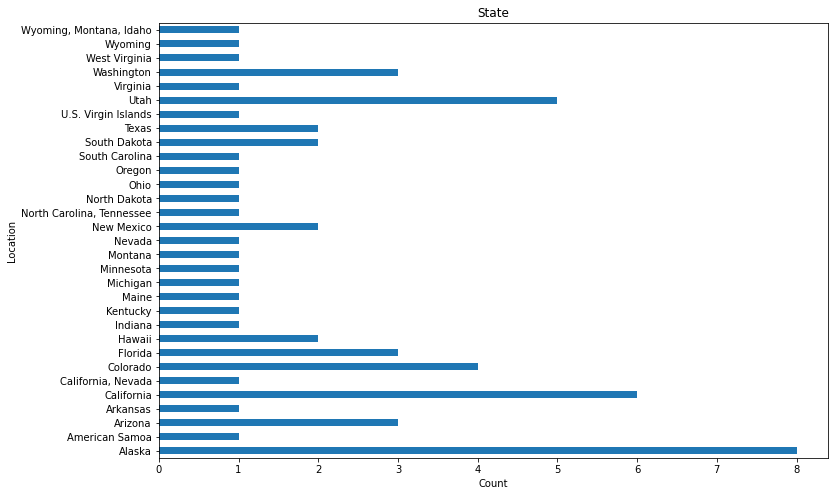

In [7]:
parks_loc = parks_data.groupby('Location')['Park Name'].nunique()
parks_loc.plot(kind='barh', figsize=(12, 8))
plt.title('State')
plt.xlabel('Count');

First, I want to isolate the animals that are historic, and this can be found in the Occurence column and are listed as 'Not In Park (Historic)'. Need to separate into an additional DataFrame as these animals are not currently found in the park and can be set aside for additional analyses. 

In [8]:
parks_data['Occurrence'].unique()

array(['Present', 'Unconfirmed', 'Not In Park', 'Probably Present', nan],
      dtype=object)

In [9]:
historic = parks_data[parks_data['Occurrence'] == 'Not In Park']
historic.shape

(3758, 27)

In [10]:
historic['Park Name'].nunique()

59

In [11]:
historic['Common Names'].nunique()

3195

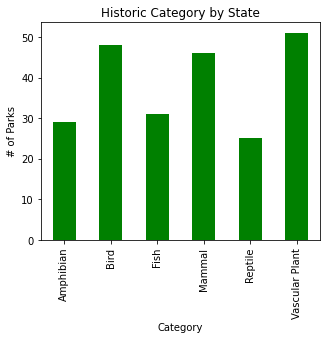

In [12]:
# Show which categories have the most historic occurences.
historic_group = historic.groupby('Category')['Park Name'].nunique()
historic_group.plot(kind='bar', color = 'g' ,figsize = (5,4))
plt.title('Historic Category by State')
plt.ylabel('# of Parks');

# Overall metrics that can be included: 
    - Total number of records by park
    - counts per category by park
    - overlap of species by state
    - individual species category comparisons
    - park area to diversity (i.e. bigger parks = more diversity?)
    - loss of species by comparing total numbers to historic df
    - investigating trends with regards to endangered species

In [13]:
parks_data = parks_data[parks_data['Occurrence'] != 'Not In Park']
total_numbers = parks_data.groupby('Park Name')['Category'].count()
total_numbers = total_numbers.sort_values(ascending = False)
total_numbers

Park Name
Redwood National Park                             3331
Death Valley National Park                        3156
Shenandoah National Park                          3125
Great Smoky Mountains National Park               2726
Grand Canyon National Park                        2418
New River Gorge National River                    2386
Big Bend National Park                            2210
Crater Lake National Park                         2076
Great Basin National Park                         2046
Yosemite National Park                            2042
Grand Teton National Park                         2020
Mammoth Cave National Park                        2013
Indiana Dunes National Park                       1973
Everglades National Park                          1949
Yellowstone National Park                         1892
North Cascades National Park                      1839
Olympic National Park                             1831
Saguaro National Park                             1805


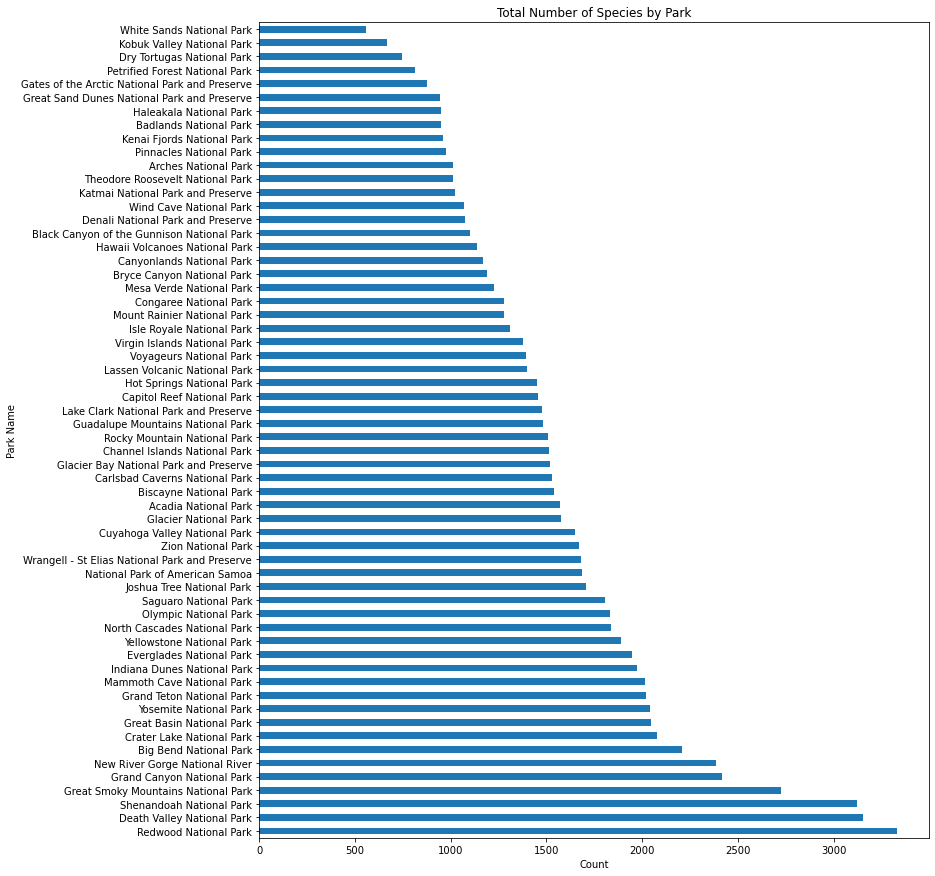

In [14]:
total_numbers.plot(kind='barh', figsize = (12,15))
plt.title('Total Number of Species by Park')
plt.xlabel('Count');

In [15]:
#Want to tally up the total number of records by category for each individual park. 
#Steps go through each park and count and total each category
totals_by_park = parks_data.groupby('Park Name')['Category'].value_counts()
Acadia = totals_by_park['Acadia National Park']
print(Acadia)
Big_Bend = totals_by_park['Big Bend National Park']
print(Big_Bend)

Category
Vascular Plant    1137
Bird               331
Mammal              49
Fish                34
Amphibian           12
Reptile             10
Name: Category, dtype: int64
Category
Vascular Plant    1589
Bird               415
Mammal              88
Reptile             62
Fish                45
Amphibian           11
Name: Category, dtype: int64


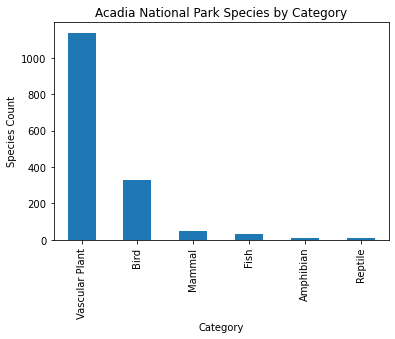

In [16]:
#Want to display results with histograms where each park is a separate histogram. 
Acadia.plot(kind='bar', figsize = (6,4))
plt.title('Acadia National Park Species by Category')
plt.ylabel('Species Count');

In [17]:
#Need to convert area to numeric value instead of object for graphical analysis.
# Remove * and 'and Preserve' to match 
parks_data.Area.replace(to_replace='\(.*\)', value = '', regex=True, inplace=True)
parks_data.Area.replace(to_replace='(\D*[acres])', value = '', regex=True, inplace=True)
parks_data.Area.replace(to_replace='([, ]*)', value = '', regex=True, inplace=True)
parks_data['Area'] = pd.to_numeric(parks_data['Area'])
parks_data['Area'].dtype
#Since units were removed to turn value from object to float need to remember all meansurements are in acres. 

dtype('float64')

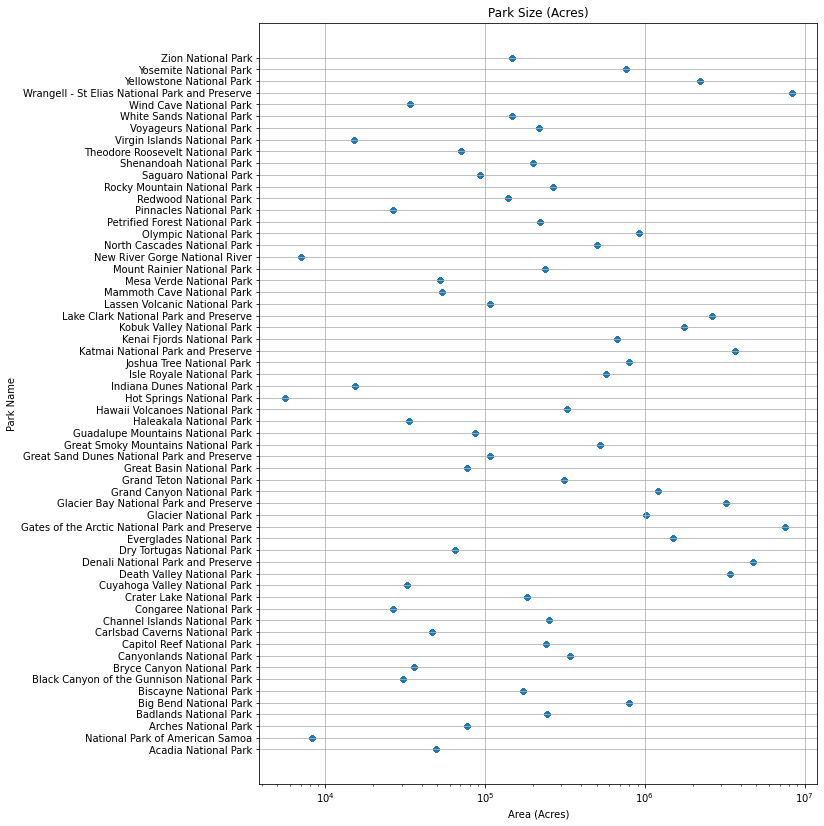

In [18]:
parks_data.plot(x='Area', y='Park Name', kind='scatter', figsize = (10,14),grid = True, logx=True)
plt.title('Park Size (Acres)')
plt.xlabel('Area (Acres)')
plt.ylabel('Park Name');

In [19]:
cat_count = pd.DataFrame(total_numbers)
cat_count = cat_count.rename(columns = {'Category':'Total Counts'})
cat_count = cat_count.reset_index()
cat_count.head()

,Park Name,Total Counts
0,Redwood National Park,3331
1,Death Valley National Park,3156
2,Shenandoah National Park,3125
3,Great Smoky Mountains National Park,2726
4,Grand Canyon National Park,2418


In [20]:
area = pd.DataFrame(parks_data[['Park Name', 'Park Code','Location', 'Area']])
area = area.drop_duplicates()
area = area.reset_index()
area = area.drop(columns = 'Unnamed: 0')
area.head()

,Park Name,Park Code,Location,Area
0,Acadia National Park,ACAD,Maine,49076.63
1,National Park of American Samoa,NPSA,American Samoa,8256.67
2,Arches National Park,ARCH,Utah,76678.98
3,Badlands National Park,BADL,South Dakota,242755.94
4,Big Bend National Park,BIBE,Texas,801163.21


In [21]:
visitors = pd.DataFrame(parks_data[['Park Name', 'Visitors (2019)']])
visitors = visitors.drop_duplicates()
visitors = visitors.reset_index()
visitors = visitors.drop(columns = 'Unnamed: 0')
visitors.head()

,Park Name,Visitors (2019)
0,Acadia National Park,3437286
1,National Park of American Samoa,60006
2,Arches National Park,1659702
3,Badlands National Park,970998
4,Big Bend National Park,463832


In [22]:
totals_by_area = cat_count.merge(area, how = 'left', on = 'Park Name')
totals=totals_by_area.merge(visitors, how = 'left', on = 'Park Name')
totals = totals[['Park Name', 'Park Code', 'Location','Total Counts', 'Area', 'Visitors (2019)']]
totals.head()

,Park Name,Park Code,Location,Total Counts,Area,Visitors (2019)
0,Redwood National Park,REDW,California,3331,138999.37,504722
1,Death Valley National Park,DEVA,"California, Nevada",3156,3408406.73,1740945
2,Shenandoah National Park,SHEN,Virginia,3125,199223.77,1425507
3,Great Smoky Mountains National Park,GRSM,"North Carolina, Tennessee",2726,522426.88,12547743
4,Grand Canyon National Park,GRCA,Arizona,2418,1201647.03,5974411


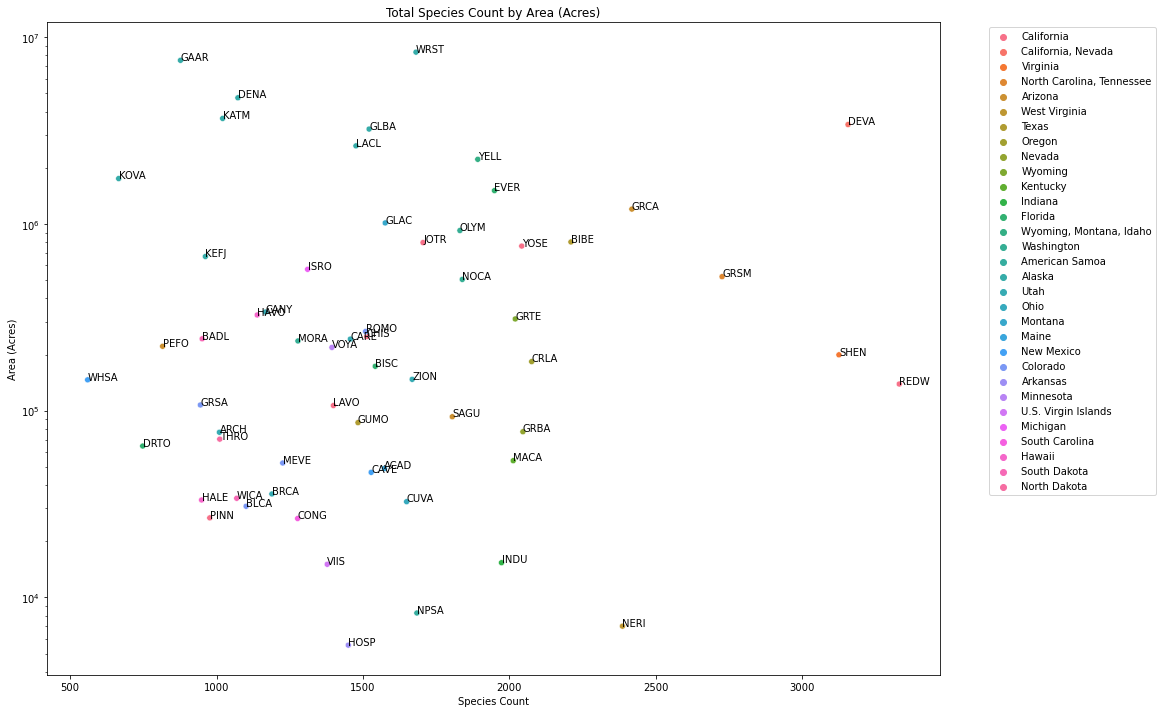

In [23]:
x = totals['Total Counts']
y = totals['Area']
label = totals['Park Code']
plt.subplots(figsize=(16,12))
sns.scatterplot(x='Total Counts', y='Area', hue= 'Location', data=totals)
for l, x, y in zip(label, x, y):
    plt.annotate(l, (x,y))
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Total Species Count by Area (Acres)')
plt.ylabel('Area (Acres)')
plt.xlabel('Species Count');

In [24]:
parks_data['Category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Crab/Lobster/Shrimp'], dtype=object)

In [25]:
animals = parks_data[parks_data['Category'] != 'Vascular Plant']

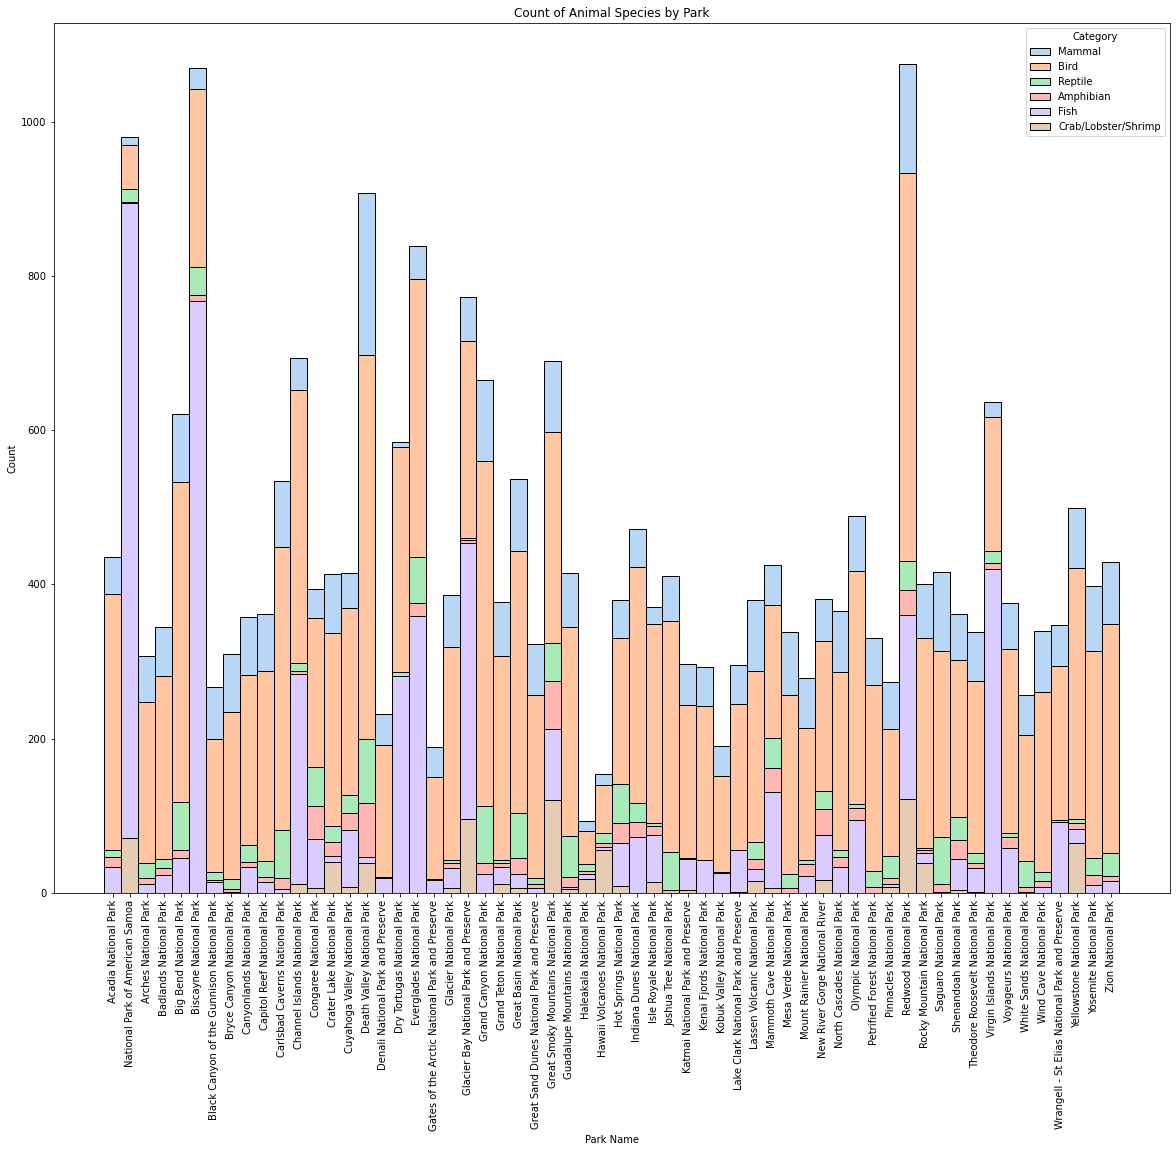

In [26]:
fig_dims = (20,16)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(ax=ax, data=animals, x='Park Name', hue = 'Category', palette='pastel' ,multiple='stack')
plt.xticks(rotation=90)
plt.title('Count of Animal Species by Park');

Subset DataFrame by each category for more in-depth analyses.

In [27]:
mammal = parks_data[parks_data['Category'] == 'Mammal']
bird = parks_data[parks_data['Category'] == 'Bird']
reptile = parks_data[parks_data['Category'] == 'Reptile']
amphibian = parks_data[parks_data['Category'] == 'Amphibian']
water = parks_data[parks_data['Category'] == 'Fish']
crustaceans = parks_data[parks_data['Category'] == 'Crab/Lobster/Shrimp']
plants = parks_data[parks_data['Category'] == 'Vascular Plant']

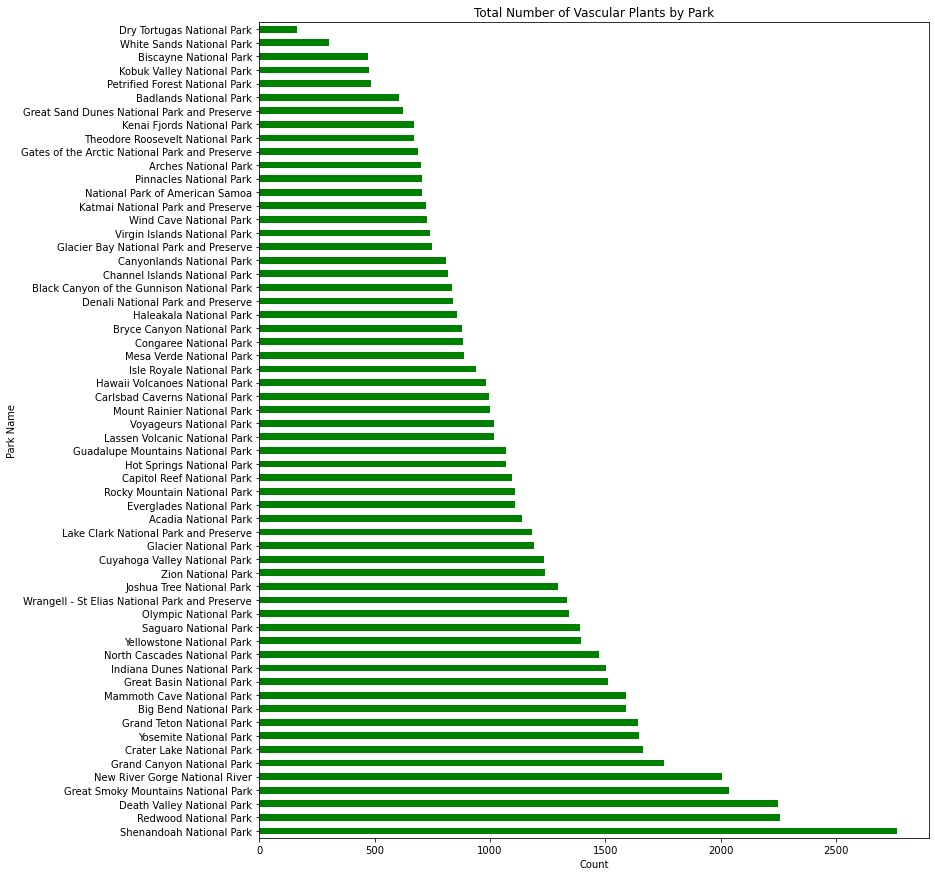

In [28]:
total_plants = plants.groupby('Park Name')['Category'].count()
total_plants = total_plants.sort_values(ascending=False)
total_plants.plot(kind='barh', figsize = (12,15), color = 'g')
plt.title('Total Number of Vascular Plants by Park')
plt.xlabel('Count');

In [29]:
total_mammals = mammal.groupby('Park Name')['Category'].count()
total_mammals = total_mammals.sort_values(ascending = False)
total_mammals.head()

Park Name
Death Valley National Park    210
Redwood National Park         141
Grand Canyon National Park    105
Saguaro National Park         102
Great Basin National Park      93
Name: Category, dtype: int64

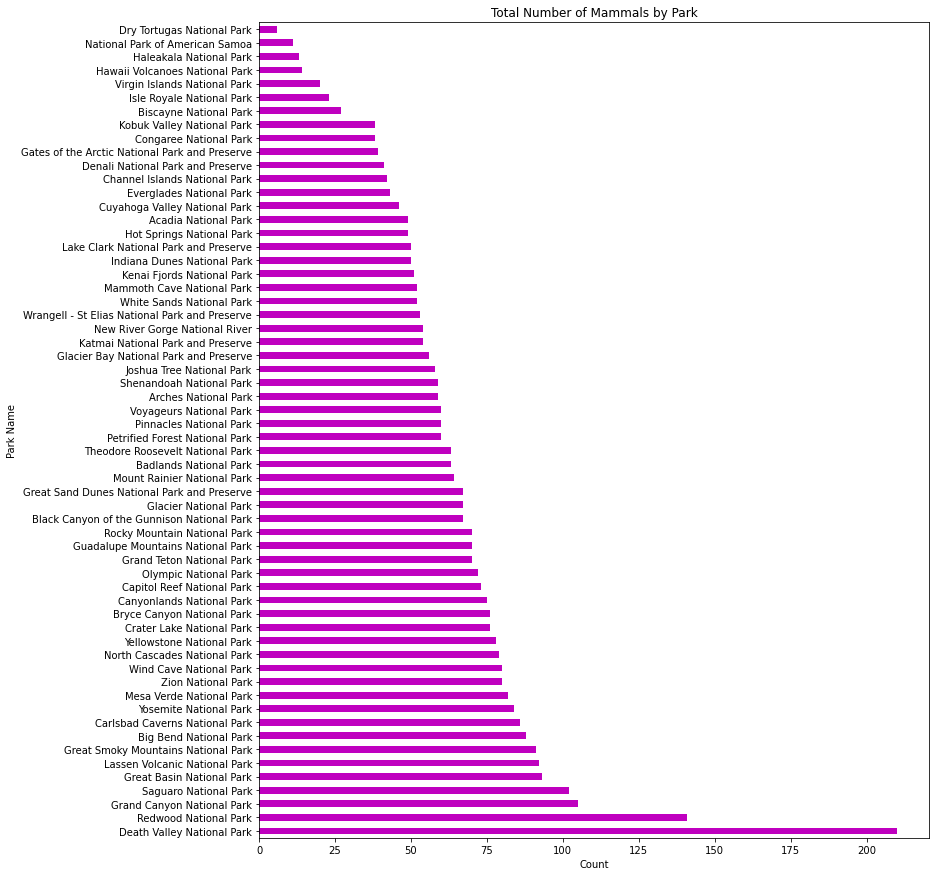

In [30]:
total_mammals.plot(kind='barh', figsize = (12,15), color = 'm')
plt.title('Total Number of Mammals by Park')
plt.xlabel('Count');

In [31]:
total_birds = bird.groupby('Park Name')['Category'].count()
total_birds = total_birds.sort_values(ascending = False)
total_birds.head()

Park Name
Redwood National Park             503
Death Valley National Park        497
Grand Canyon National Park        447
Big Bend National Park            415
Carlsbad Caverns National Park    367
Name: Category, dtype: int64

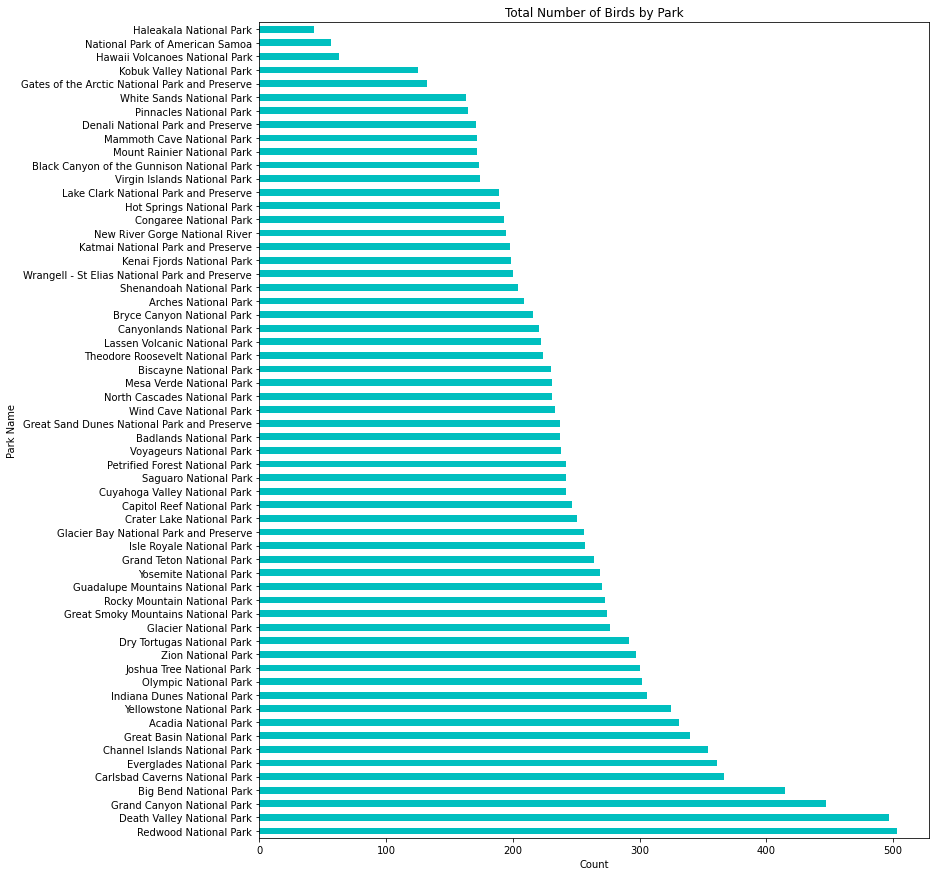

In [32]:
total_birds.plot(kind='barh', figsize = (12,15), color = 'c')
plt.title('Total Number of Birds by Park')
plt.xlabel('Count');

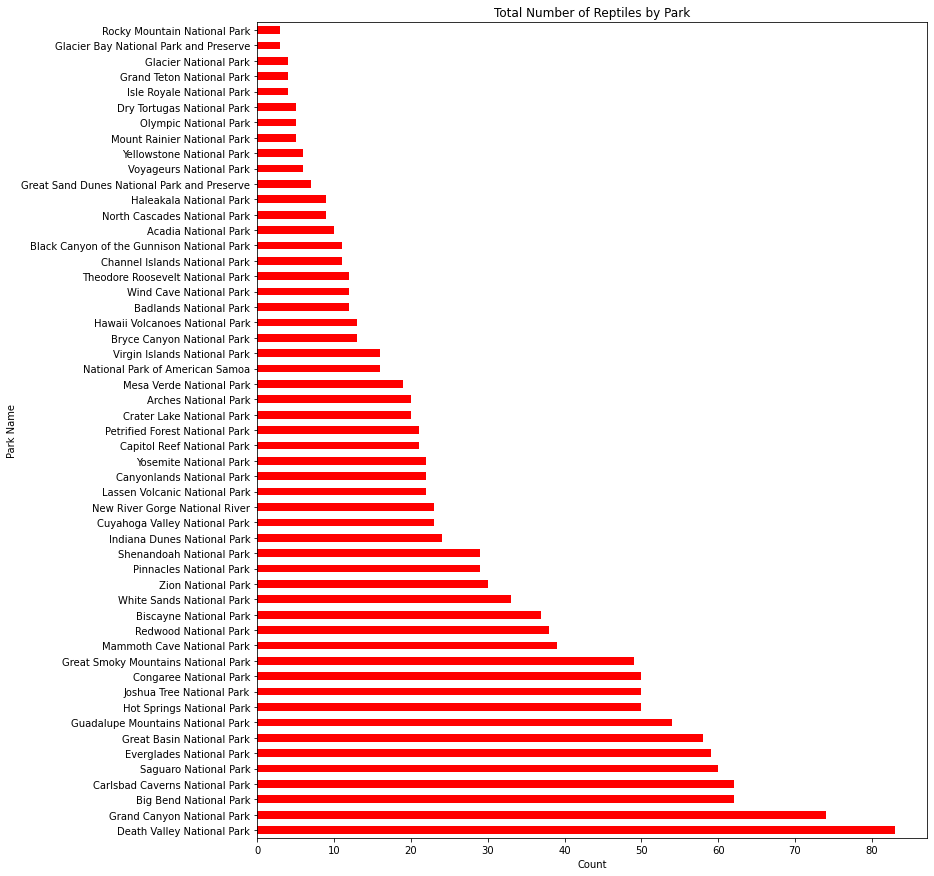

In [33]:
total_reptiles = reptile.groupby('Park Name')['Category'].count()
total_reptiles = total_reptiles.sort_values(ascending = False)
total_reptiles.plot(kind='barh', figsize = (12,15), color = 'r')
plt.title('Total Number of Reptiles by Park')
plt.xlabel('Count');

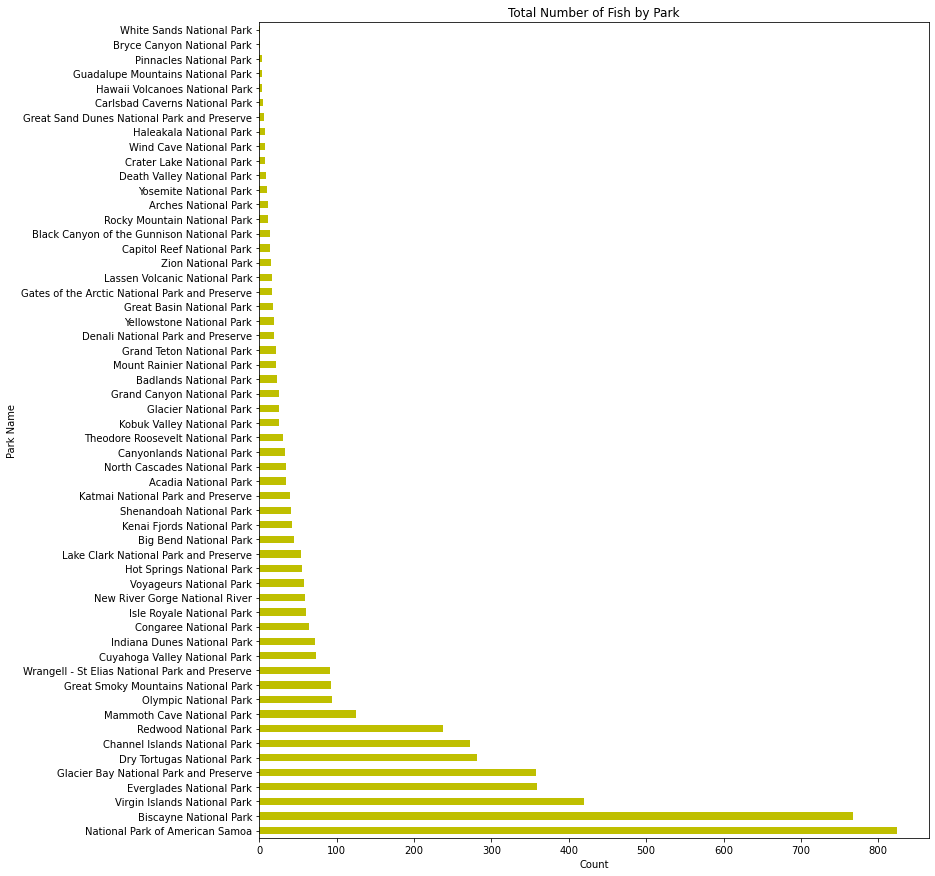

In [34]:
total_fish = water.groupby('Park Name')['Category'].count()
total_fish = total_fish.sort_values(ascending = False)
total_fish.plot(kind='barh', figsize = (12,15), color = 'y')
plt.title('Total Number of Fish by Park')
plt.xlabel('Count');

Next, I want to investigate if there are any overlap between parks within the same state with regards to species. Since Alaska has the most number of parks (8 total), I will start with that.

In [35]:
alaska = parks_data[parks_data['Location'] == 'Alaska']
overlap = alaska[alaska.duplicated(['Scientific Name', 'Park Name'], keep=False)] 
overlap_names = overlap[['Scientific Name', 'Park Name']]
overlap_names

,Scientific Name,Park Name
Unnamed: 0,,
30062,Stuckenia filiformis ssp. alpina,Gates of the Arctic National Park and Preserve
30063,Stuckenia filiformis ssp. alpina,Gates of the Arctic National Park and Preserve
30597,Hierochloe odorata,Gates of the Arctic National Park and Preserve
30598,Hierochloe odorata,Gates of the Arctic National Park and Preserve
56264,Linnaea borealis ssp. americana,Katmai National Park and Preserve
56265,Linnaea borealis ssp. americana,Katmai National Park and Preserve
56449,Salix rotundifolia,Katmai National Park and Preserve
56450,Salix rotundifolia,Katmai National Park and Preserve
57470,Salix rotundifolia,Kenai Fjords National Park


Some overlap between plant species, however no records were pulled that showed overlap between animal species. Would be interesting to look at park distribution by state. Lack of overlap between species could be due to geographical isolation. 

Next analysis, I want to look into the loss of species by park. I will do this using the historic dataframe to see if certain National Parks have exhibited a greater loss than others. 

In [36]:
#total_numbers is the groupby object for the total number of species for each park
historic_counts = historic.groupby('Park Name')['Category'].nunique()
historic_counts
species_lost = pd.DataFrame(total_numbers)
species_lost = species_lost.merge(historic_counts, how = 'left', on = 'Park Name')
species_lost = species_lost.rename(columns={'Category_x': 'Current Count', 'Category_y': 'Species Lost'})
species_lost = species_lost.dropna()
species_lost

,Current Count,Species Lost
Park Name,,
Redwood National Park,3331,4.0
Death Valley National Park,3156,5.0
Shenandoah National Park,3125,5.0
Great Smoky Mountains National Park,2726,6.0
Grand Canyon National Park,2418,5.0
New River Gorge National River,2386,4.0
Big Bend National Park,2210,3.0
Crater Lake National Park,2076,4.0
Great Basin National Park,2046,5.0


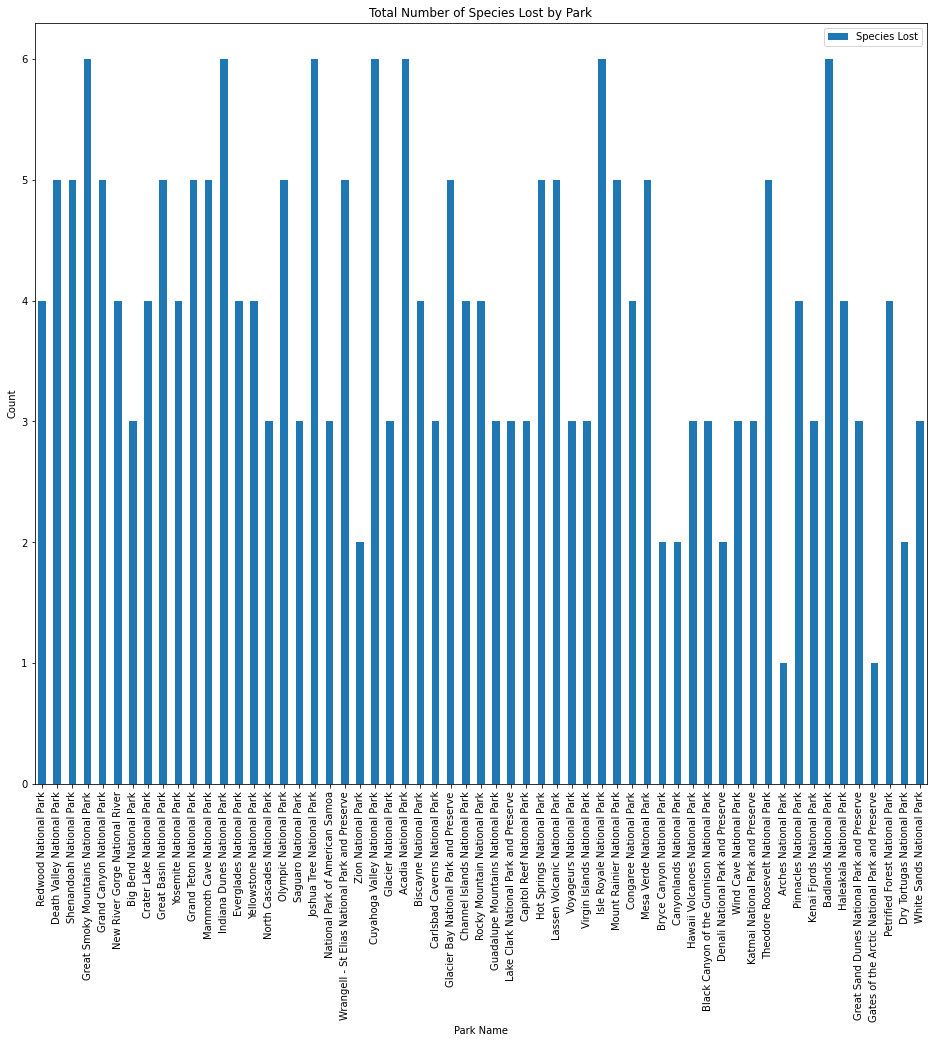

In [37]:
species_lost.plot(y='Species Lost', kind='bar', figsize=(16,14))
plt.xticks(rotation=90)
plt.title('Total Number of Species Lost by Park')
plt.ylabel('Count');

Now I want to focus on isolating the species that are indentified as: 
Species of Concern - SC, 
Threatened - T, 
Endangered - E, 
Recovery - DM, 
Proposed Threatened - PT
These are the identifiers for species listed under the Federal Endangered Species Act List as recorded by the US Fish and Wildlife Service. 

In [38]:
parks_data['T&E'].unique()

array([nan, 'SC', 'E', 'RT', 'SC,SU', 'SU', 'UR', 'DM', 'T', 'RT,SC',
       'EXPN', 'SAT', 'C', 'DM,E', 'PSAT', 'C,RT', 'SU,T', 'DP', 'E,RT',
       'E,T', 'PT', 'RT,T', 'T,UR', 'E,EXPN'], dtype=object)

In [39]:
endangered = parks_data[parks_data['T&E'].notnull()]
endangered.head()

,Park Name,Location,Date Established,Area,Visitors (2019),Park Code,Category,Category Sort,Order,Family,...,Record Status,Occurrence,Nativeness,Abundance,NPS Tags,Observations,T&E,State Status,GRank,SRank
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2,Acadia National Park,Maine,"February 26, 1919",49076.63,3437286,ACAD,Mammal,1,Carnivora,Canidae,...,Approved,Present,Non-native,Common,NaN,1.0,SC,NaN,G5,ME: S5
3,Acadia National Park,Maine,"February 26, 1919",49076.63,3437286,ACAD,Mammal,1,Carnivora,Canidae,...,Approved,Unconfirmed,Native,NaN,NaN,NaN,E,NaN,G5,ME: SH
6,Acadia National Park,Maine,"February 26, 1919",49076.63,3437286,ACAD,Mammal,1,Carnivora,Felidae,...,Approved,Present,Non-native,NaN,Vagrant,NaN,RT,NaN,G5,ME: S5
20,Acadia National Park,Maine,"February 26, 1919",49076.63,3437286,ACAD,Mammal,1,Chiroptera,Vespertilionidae,...,Approved,Present,Native,Uncommon,NaN,NaN,"SC,SU",NaN,G5,ME: S4
21,Acadia National Park,Maine,"February 26, 1919",49076.63,3437286,ACAD,Mammal,1,Chiroptera,Vespertilionidae,...,Approved,Present,Native,Unknown,NaN,NaN,SC,ME: SC,G3G4,ME: SU


Saving data files for furthur analysis.

In [40]:
parks_data.to_csv('Data/parks_data.csv')
historic.to_csv('Data/historic.csv')
endangered.to_csv('Data/endangered.csv')